In [1]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2hsv
from skimage.transform import resize
import matplotlib.pyplot as plt

(652, 870, 3)


(64, 64, 3)

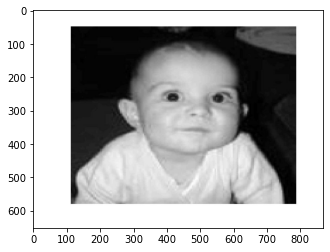

In [4]:
image = imread("images/image1.jpg")
print(image.shape)
plt.imshow(image)
image = resize(image, (64, 64))
hsv = rgb2hsv(image)

hsv.shape

In [5]:
def get_features(h, s, v):
  return np.array([v, v * s * np.sin(h), v * s * np.cos(h)])

def get_features_rgb(r, g, b):
  return np.array([r,g,b])

In [6]:
def get_feature_diff(feature_1, feature_2, sigma):
  out = np.sum(np.square((feature_1 - feature_2)))/sigma
  return out

def get_difference_x(pt1, pt2, sigma):
  dist = ((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2 )
  return dist/sigma, dist

def get_difference_feature(pt1, pt2, feature_1, feature_2, r, sigmaI, sigmaX):
  x_feat, dist = get_difference_x(pt1, pt2, sigmaX)

  if dist > r:
    return 0
  else:
    feature_diff = get_feature_diff(feature_1, feature_2, sigmaI)
    result = np.exp(-x_feat) * np.exp(-feature_diff)
  
  return result

def precompute_features(img):
  feature_matrix = np.zeros(img.shape)

  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      feature_matrix[i,j] = get_features(img[i,j,0], img[i,j,1], img[i,j,2])
  
  return feature_matrix

def create_weight_matrix(img,r, sigmaI, sigmaX, mask = None):

    feature_matrix = precompute_features(img)

    weight_matrix = np.zeros((img.shape[0] * img.shape[1], img.shape[0] * img.shape[1]))
    print(img.shape[0])
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        for k in range(img.shape[0]):
          for l in range(img.shape[1]):
            pt1 = [i, j]
            pt2 = [k, l]
            feature1 = feature_matrix[i,j]
            feature2 = feature_matrix[k, l]
            result = get_difference_feature(pt1, pt2, feature1, feature2, r, sigmaI, sigmaX)
            if i == k and j == l:
              result = 1
            
            weight_matrix[i * img.shape[0] + j, k * img.shape[0] + l] = result

    return weight_matrix  

In [7]:
precompute_features(hsv).shape

(64, 64, 3)

In [8]:
%timeit
weight_matrix = create_weight_matrix(hsv, 15, 0.1, 4)
np.diag(weight_matrix)

64


array([1., 1., 1., ..., 1., 1., 1.])

In [9]:
def create_diag_matrix(weight_matrix):
  y = np.zeros(weight_matrix.shape[0])

  for i in range(weight_matrix.shape[0]):
    y[i] = np.sum(weight_matrix[i,:])
    print(y[i])
  
  
  
  diag_matrix = np.diag(y)
  return diag_matrix

diag_matrix = create_diag_matrix(weight_matrix)


5.060752847190291
6.814674085458417
7.643167814558385
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.86942624557587
7.869426245

12.230937389772375
11.884470800075249
10.609394071956736
7.948265231645072
5.4198170117074635
8.976063952145784
11.115022347096993
12.024376425001211
12.231544194442774
12.231152352864036
12.229580495190607
12.229049273340474
12.221155255477857
12.102138698568167
11.589632175668639
10.339126153474046
8.645124348902344
8.244031695623166
9.746782755298288
11.241533684851719
11.366112060794123
11.773750956611767
11.787041397520108
11.868835402657751
11.983673864048669
11.96041330963328
12.152074926084902
12.141942376781982
11.932459362677376
11.803951220500895
11.638187536804399
11.59236043447541
11.749792322605467
11.88995580103017
11.999999544892756
12.039151518002305
11.857585168493495
11.331649620613426
10.712878359499847
9.49834387959781
7.913703835533025
8.437935942334487
10.18687835049338
11.509016714963899
12.054783582451709
12.184994426927336
12.19443813240883
12.169173052041915
12.18194944142049
12.192338506829431
12.019853614530334
11.454228188840233
9.833753033594155
6.5980569

11.887575956069211
12.234693593542318
12.23448480056583
12.201586866849912
12.052528181314186
11.749976591437324
11.406263236296196
11.231795667324937
11.28862205718564
11.453838651444228
11.596861977507647
11.67767173492316
11.713738297482914
11.712772912869285
11.667424411935944
11.579106028214763
11.486533317311977
11.432842187267783
11.436145099648805
11.482814699941823
11.556951446006785
11.637018476786158
11.700811091991785
11.730828465567162
11.728262478264787
11.706559683278739
11.679115027107171
11.656874026226246
11.649305128168567
11.659802723032241
11.68796250286312
11.7246239850937
11.754308209248807
11.754316315292161
11.710209747649396
11.629039966205342
11.539256992713344
11.461495042637665
11.376657714905669
11.235011821531128
11.028257091063217
10.846328234379541
10.816267287317306
10.977218680014103
11.249817026625742
11.517017185951534
11.704987855274528
11.802603188593755
11.83261984341605
11.823006758664324
11.753727967339481
11.55677049472243
11.207661936732375
1

In [10]:
diag_matrix

array([[5.06075285, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.81467409, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 7.64316781, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 7.64316781, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 6.81467409,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.06075285]])

In [11]:
print(np.diag(diag_matrix))
D = np.diag(1/np.sqrt(np.diag(diag_matrix)))
print(D.shape)

[5.06075285 6.81467409 7.64316781 ... 7.64316781 6.81467409 5.06075285]
(4096, 4096)


In [12]:
final = D @ (diag_matrix - weight_matrix) @ D


In [13]:
u, v = np.linalg.eigh(final)

In [14]:
u[:10]

array([-8.50612914e-19,  1.49000501e-03,  1.80628494e-03,  2.59924093e-03,
        3.93029792e-03,  4.35702372e-03,  5.38018608e-03,  7.46108221e-03,
        8.47685171e-03,  1.00054297e-02])

In [15]:
print(v.shape)
print(v[:,1])


(4096, 4096)
[-0.02482192 -0.0287485  -0.03034033 ...  0.0186248   0.01774733
  0.01537216]


In [16]:
seg_map = np.copy(v[:,1].reshape((64,64)))

minimum = np.min(seg_map)
maximum = np.max(seg_map)

In [17]:
seg_map = (seg_map - minimum)/(maximum - minimum)

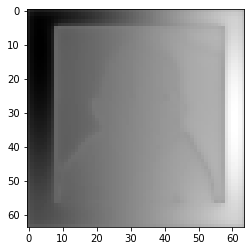

In [18]:
plt.imshow(seg_map, cmap="gray")

In [19]:
seg_map = v[:,3].reshape((64,64))
def view_segmap(seg_map):
  minimum = np.min(seg_map)
  maximum = np.max(seg_map)
  seg_map = (seg_map - minimum)/(maximum - minimum)
  plt.imshow(seg_map, cmap="gray")

0.3275144714658681


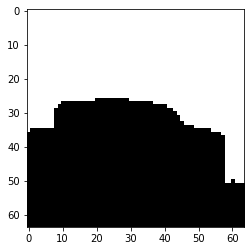

In [20]:
seg_map = np.copy(v[:,2].reshape((64,64)))

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
print(median)
final_map = seg_map > median
plt.imshow(final_map, cmap="gray")

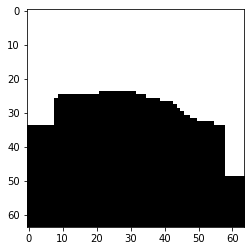

In [21]:
seg_map = v[:,2].reshape((64,64)) * final_map

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map2 = seg_map > median
plt.imshow(final_map2, cmap="gray")

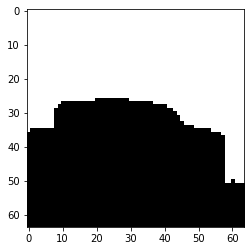

In [22]:
seg_map = v[:,2].reshape((64,64)) * (1 - final_map)

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map3 = seg_map > median
plt.imshow(final_map3, cmap="gray")

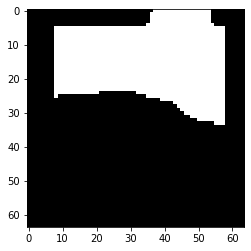

In [23]:
seg_map = v[:,3].reshape((64,64)) * final_map2 * final_map

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map4 = seg_map > median
plt.imshow(final_map4, cmap="gray")

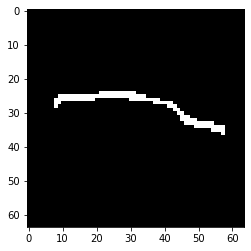

In [24]:
seg_map = v[:,3].reshape((64,64)) * (1 - final_map2) * final_map

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map5 = seg_map > median
plt.imshow(final_map5, cmap="gray")

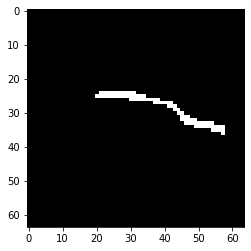

In [25]:
seg_map = v[:,4].reshape((64,64))* final_map5* (1 - final_map2) * final_map

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map6 = seg_map > median
plt.imshow(final_map6, cmap="gray")

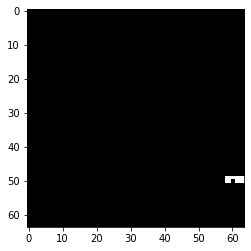

In [26]:
seg_map = v[:,4].reshape((64,64))* (1-final_map5)* (1 - final_map2) * final_map

minimum = np.min(seg_map)
maximum = np.max(seg_map)

seg_map = (seg_map - minimum)/(maximum - minimum)
median = np.median(seg_map)
final_map7 = seg_map > median
plt.imshow(final_map7, cmap="gray")

In [27]:
import sys
from numpy import array, reshape, shape, matrix, ones, zeros, sqrt, sort, arange
from numpy import nonzero, fromfile, tile, append, prod, double, argsort, sign
from numpy import kron, multiply, divide, abs, reshape, asarray
from scipy import rand
from scipy.sparse import csc_matrix, spdiags
from scipy.sparse.linalg.eigen.arpack import eigsh
from scipy.linalg import norm, svd, LinAlgError

# exception hander for singular value decomposition
class SVDError(Exception):
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)


def ncut(W, nbEigenValues):
    # parameters
    offset = .5
    maxiterations = 100
    eigsErrorTolerence = 1e-6
    truncMin = 1e-6
    eps = 2.2204e-16

    m = shape(W)[1]

    
    d = abs(W).sum(0)
    dr = 0.5 * (d - W.sum(0))
    d = d + offset * 2
    dr = dr + offset

    # calculation of the normalized LaPlacian
    W = W + spdiags(dr, [0], m, m, "csc")
    Dinvsqrt = spdiags((1.0 / sqrt(d + eps)), [0], m, m, "csc")
    P = Dinvsqrt * (W * Dinvsqrt);

    # perform the eigen decomposition
    #eigen_val, eigen_vec = eigsh(P, nbEigenValues, maxiter=maxiterations, tol=eigsErrorTolerence, which='LA')
    eigen_val, eigen_vec = eigsh(P, nbEigenValues, tol=eigsErrorTolerence, which='LA')

    # sort the eigen_vals so that the first
    # is the largest
    i = argsort(-eigen_val)
    eigen_val = eigen_val[i]
    eigen_vec = eigen_vec[:, i]

    # normalize the returned eigenvectors
    eigen_vec = Dinvsqrt * matrix(eigen_vec)
    norm_ones = norm(ones((m, 1)))
    for i in range(0, shape(eigen_vec)[1]):
        eigen_vec[:, i] = (eigen_vec[:, i] / norm(eigen_vec[:, i])) * norm_ones
        if eigen_vec[0, i] != 0:
            eigen_vec[:, i] = -1 * eigen_vec[:, i] * sign(eigen_vec[0, i])

    return (eigen_val, eigen_vec)


# eigenvec_discrete=discretisation( eigen_vec ):
#
# This function performs the second step of normalized cut clustering which assigns features to clusters 
# based on the eigen vectors from the LaPlacian of a similarity matrix. There are a few different ways to
# perform this task. Shi and Malik (2000) iteratively bisect the features based on the positive and 
# negative loadings of the eigenvectors. Ng, Jordan and Weiss (2001) proposed to perform K-means clustering
# on the rows of the eigenvectors. The method implemented here was proposed by Yu and Shi (2003) and it finds
# a discrete solution by iteratively rotating a binaised set of vectors until they are maximally similar to
# the the eigenvectors (for more information, the full citation is at the top of this file). An advantage
# of this method over K-means is that it is _more_ deterministic, i.e. you should get very similar results
# every time you run the algorithm on the same data.
#
# The number of clusters that the features are clustered into is determined by the number of eignevectors 
# (number of columns) in the input array eigen_vec. A caveat of this method, is that number of resulting
# clusters is bound by the number of eignevectors, but it may contain less.
#
#    eigen_vec:          Eigenvectors of the normalized LaPlacian calculated from the similarity matrix 
#                        for the corresponding clustering problem
#    eigen_vec_discrete: (output) discretised eigenvectors, i.e. vectors of 0 and 1 which indicate 
#                        wether or not a feature belongs to the cluster defined by the eigen vector.
#                        I.E. a one in the 10th row of the 4th eigenvector (column) means that feature
#                        10 belongs to cluster #4.
# 
def discretisation(eigen_vec):
    eps = 2.2204e-16

    # normalize the eigenvectors
    [n, k] = shape(eigen_vec)
    vm = np.linalg.norm(eigen_vec, axis=0, keepdims = True)
    eigen_vec = divide(eigen_vec, vm)

    svd_restarts = 0
    exitLoop = 0

    ### if there is an exception we try to randomize and rerun SVD again
    ### do this 30 times
    while (svd_restarts < 30) and (exitLoop == 0):

        # initialize algorithm with a random ordering of eigenvectors
        c = zeros((n, 1))
        R = matrix(zeros((k, k)))
        print(R[:, 0].shape)
        R[:, 0] = eigen_vec[int(rand(1) * (n)), :].transpose()[:, np.newaxis]

        for j in range(1, k):
            c = c + abs(eigen_vec * R[:, j - 1])
            R[:, j] = eigen_vec[c.argmin(), :].transpose()[:, np.newaxis]

        lastObjectiveValue = 0
        nbIterationsDiscretisation = 0
        nbIterationsDiscretisationMax = 20

        # iteratively rotate the discretised eigenvectors until they
        # are maximally similar to the input eignevectors, this
        # converges when the differences between the current solution
        # and the previous solution differs by less than eps or we
        # we have reached the maximum number of itarations
        while exitLoop == 0:
            nbIterationsDiscretisation = nbIterationsDiscretisation + 1

            # rotate the original eigen_vectors
            tDiscrete = eigen_vec * R

            # discretise the result by setting the max of each row=1 and
            # other values to 0
            j = reshape(asarray(tDiscrete.argmax(1)), n)
            eigenvec_discrete = csc_matrix((ones(len(j)), (range(0, n), array(j))), shape=(n, k))

            # calculate a rotation to bring the discrete eigenvectors cluster to the
            # original eigenvectors
            tSVD = eigenvec_discrete.transpose() * eigen_vec
            # catch a SVD convergence error and restart
            try:
                U, S, Vh = svd(tSVD)
                svd_restarts += 1
            except LinAlgError:
                # catch exception and go back to the beginning of the loop
                print >> sys.stderr, "SVD did not converge, randomizing and trying again"
                break

            # test for convergence
            NcutValue = 2 * (n - S.sum())
            if ((abs(NcutValue - lastObjectiveValue) < eps ) or
                    ( nbIterationsDiscretisation > nbIterationsDiscretisationMax )):
                exitLoop = 1
            else:
                # otherwise calculate rotation and continue
                lastObjectiveValue = NcutValue
                R = matrix(Vh).transpose() * matrix(U).transpose()

    if exitLoop == 0:
        raise SVDError("SVD did not converge after 30 retries")
    else:
        return (eigenvec_discrete)


In [28]:
disc = discretisation(v[:,1:10])

(9, 1)


/home/sangeeta/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:126: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead


In [29]:
disc

<4096x9 sparse matrix of type '<class 'numpy.float64'>'
	with 4096 stored elements in Compressed Sparse Column format>

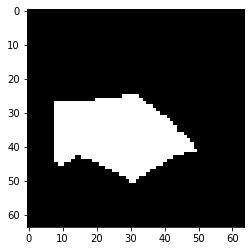

In [30]:
view_segmap(disc[:,0].todense().reshape((64,64)))

Fitting model on a small sub-sample of the data
done in 0.069s.
Predicting color indices on the full image (k-means)
done in 0.001s.
Predicting color indices on the full image (random)
done in 0.001s.


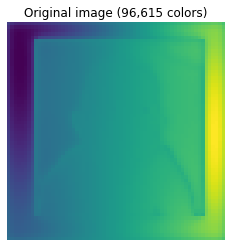

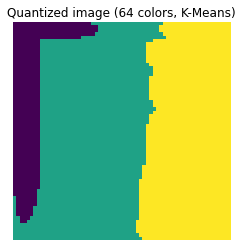

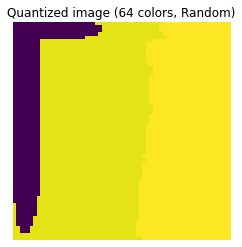

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 3

# Load the Summer Palace photo
china = np.copy(v[:,1].reshape((64,64)))

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) 

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(china.shape)
d = 1
assert d == 1
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).reshape((64,64)))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h).reshape((64,64)))
plt.show()

In [32]:
print(u)

[-8.50612914e-19  1.49000501e-03  1.80628494e-03 ...  1.00799345e+00
  1.00807009e+00  1.00831401e+00]


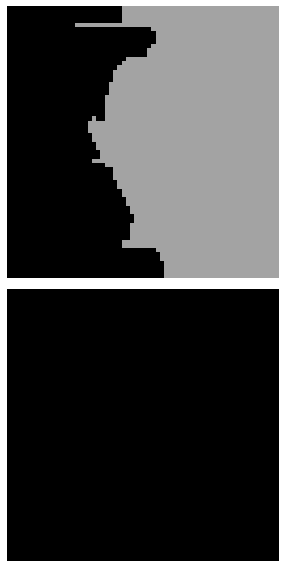

In [33]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(image, compactness=30, n_segments=3)
out1 = color.label2rgb(labels1, image, kind='avg', bg_label=0)

g = graph.rag_mean_color(hsv, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, image, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()